In [22]:
import pandas as pd 
import preprocessing
import SpreadsheetAPI

import matplotlib.pyplot as plt 
import seaborn as sns 

In [10]:
df_1 = pd.read_csv('./data/data.csv')
df_2 = pd.read_csv('./data/datav2.csv')
df = pd.read_csv('./data/yonelimfinal.csv')
api_form = pd.read_csv('./data/googleAPI.csv')
model_output = pd.read_csv('./data/model_output.csv')

ssd = SpreadsheetAPI.SheetData(
    json_file='turkey-political-opinions-86737a2fd0bb.json',
    form_name='Turkey Political Opinions Predictions (Yanıtlar)',
    works_sheet='Form Yanıtları 1',
    columns = list(df_1.columns),
    data_path='./data/googleAPI.csv'
)

ssd.getData()

concatenated_df = pd.concat([df_1, df_2, df, api_form, model_output], axis=0, ignore_index=True)

data = concatenated_df.copy()

In [11]:
data = data.drop(columns=['Timestamp'], axis=1)

In [23]:
tokenizer = preprocessing.Tokenizer(data)

In [26]:
data = tokenizer.trToEn()

In [27]:
data.columns = [
    'Gender', 'Age', 'Region', 'Education', 'Question1', 'Question2', 'Question3', 
    'Question4', 'Question5', 'Question6', 'Question7', 'Question8', 'Question9', 
    'Question10', 'Party'
]

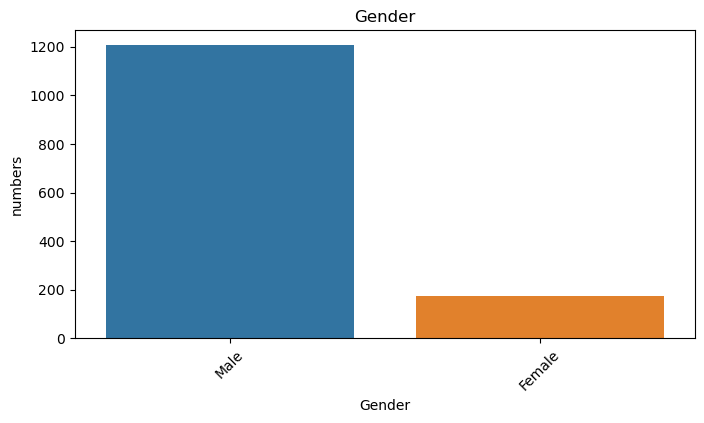

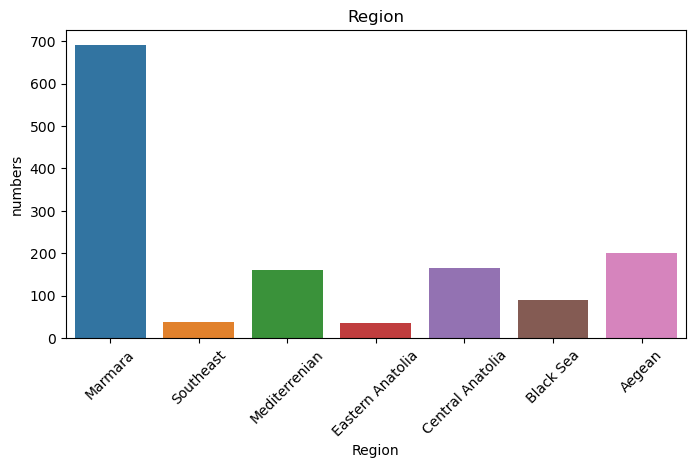

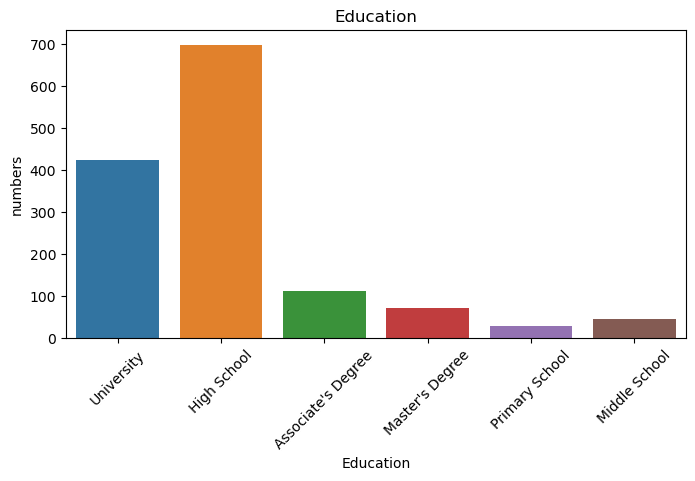

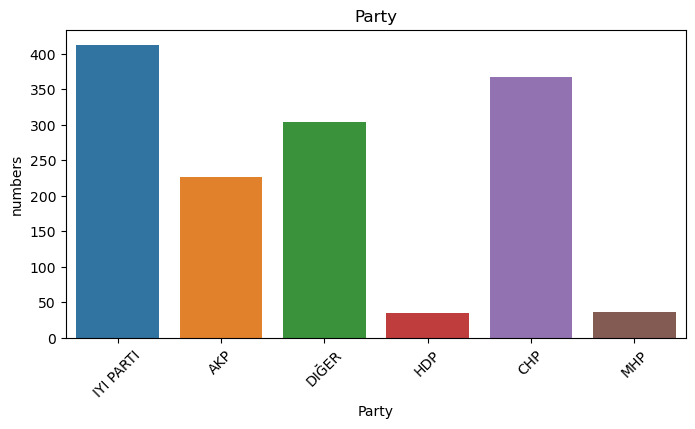

In [28]:
categorical_columns = ['Gender', 'Region', 'Education', 'Party']
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=data)
    plt.title(f"{col}")
    plt.xlabel(col)
    plt.ylabel("numbers")
    plt.xticks(rotation=45)
    plt.show()

In [15]:
quiestion_cols = {    
    'Question1' : 'Do you think our Economic Status is good?',
    'Question2' : 'Need Reform in Education?',
    'Question3' : 'Resolve Privatization Are You?',
    'Question4' : 'Should the state use a penalty like death penalty for certain crimes?',
    'Question5' : 'Do you find our journalists neutral enough?',
    'Question6' : 'From 22:00 am Then Are You Supporting the Prohibition to Buy Drinks?',
    'Question7' : 'Do You Want to Live in a Secular State?',
    'Question8' : 'Are you supporting the abortion ban?',
    'Question9' : 'Do you think that the extraordinary state (Ohal) restricts Freedoms?',
    'Question10' : 'Would you like a new part of the parliament to enter?'
}

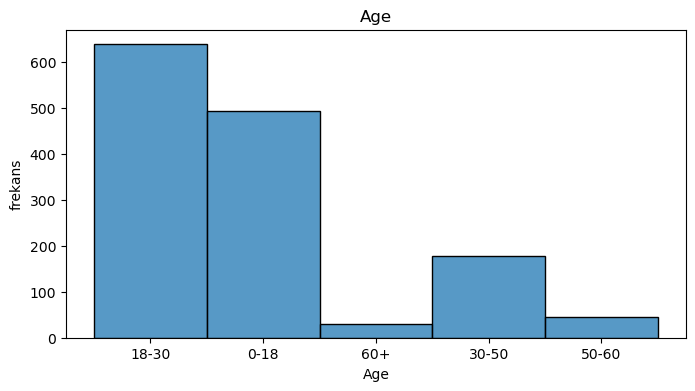

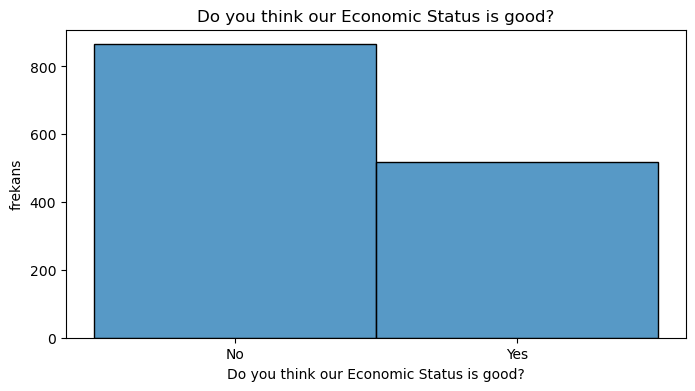

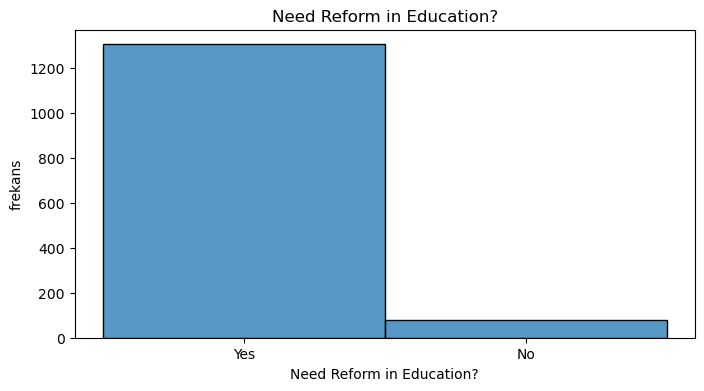

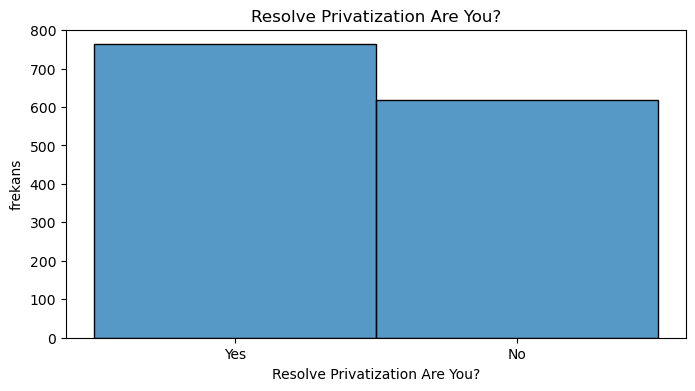

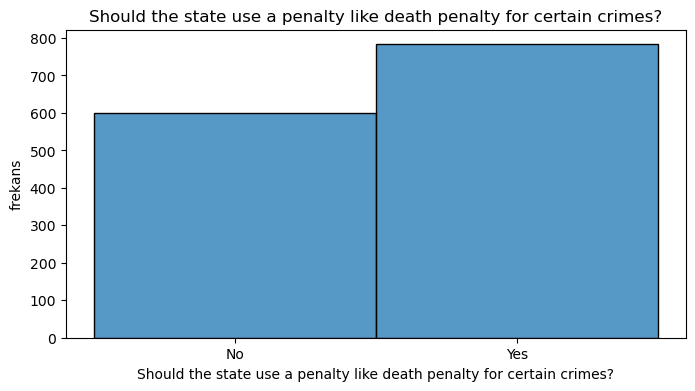

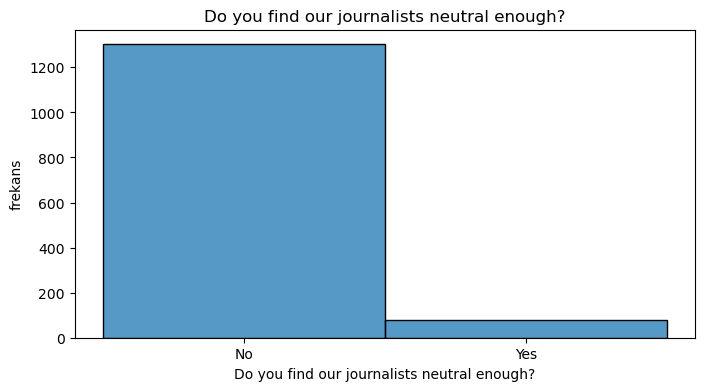

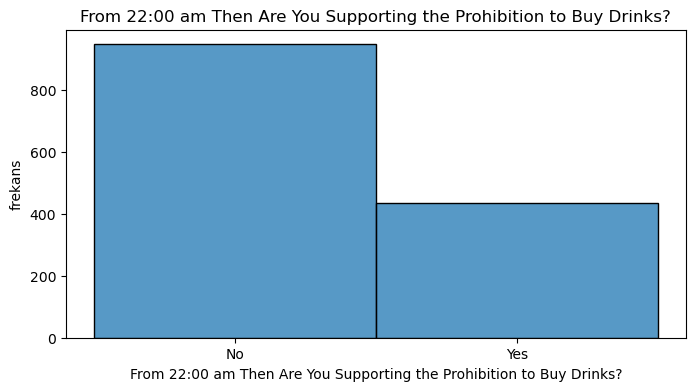

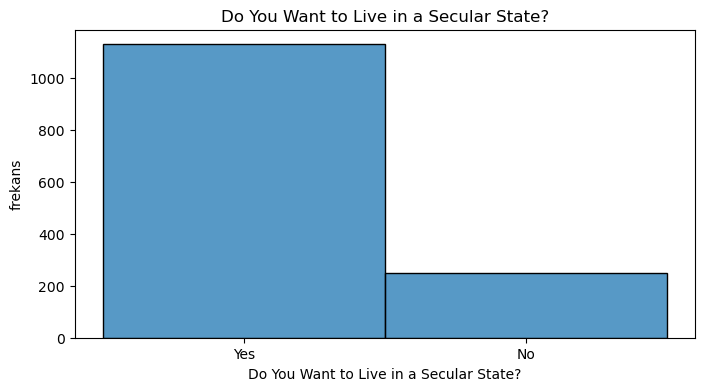

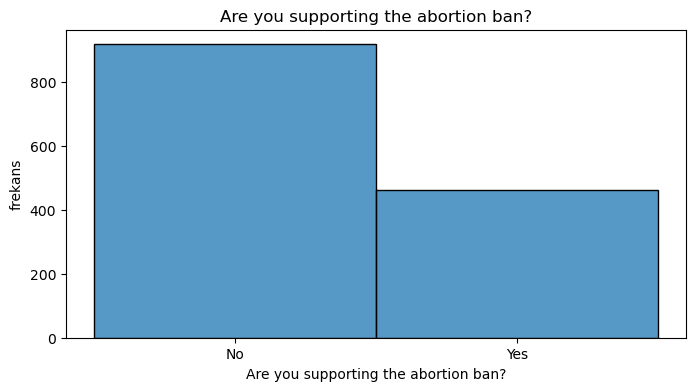

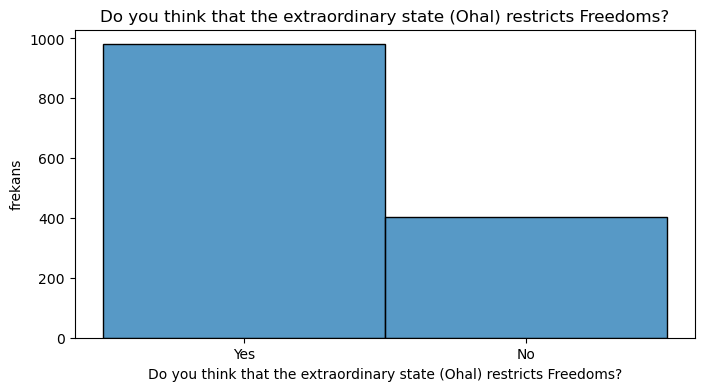

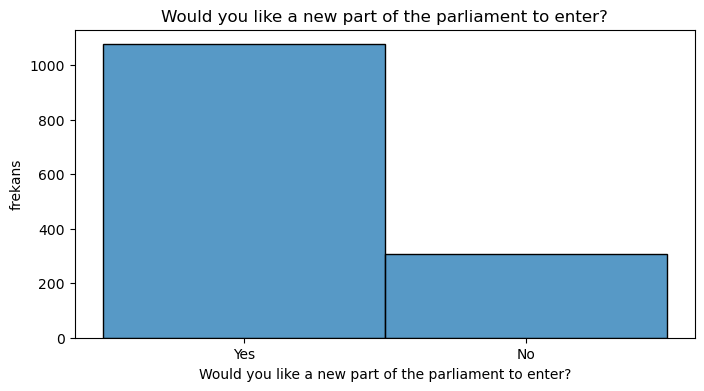

In [16]:
numerical_columns = [
        'Age', 'Question1', 'Question2', 'Question3', 
        'Question4', 'Question5', 'Question6', 'Question7', 
        'Question8', 'Question9', 'Question10'
]

for col in numerical_columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(data[col])
        
        if col == 'Age':
                plt.xlabel(col)
                plt.title(col)
        else:
                plt.xlabel(quiestion_cols[col])
                plt.title(quiestion_cols[col])

        plt.ylabel('frekans')
        plt.show()


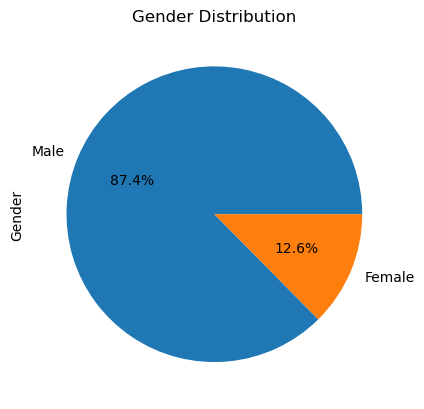

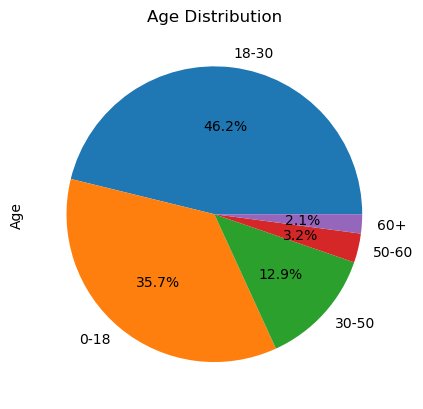

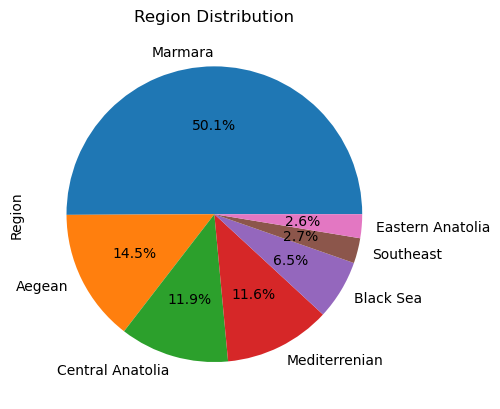

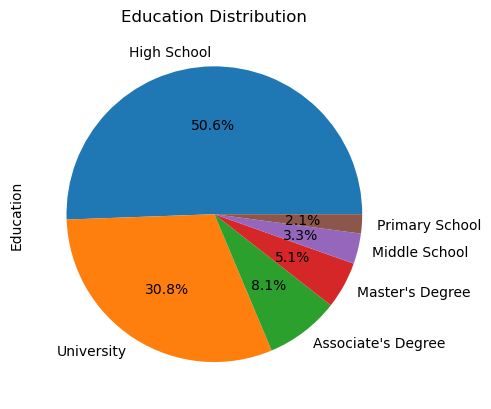

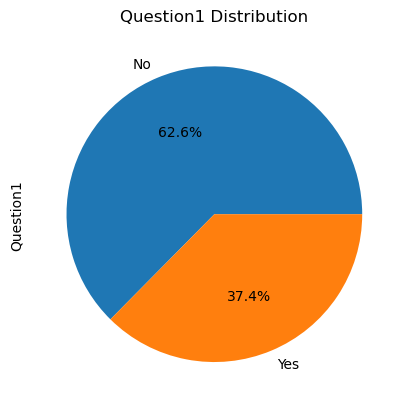

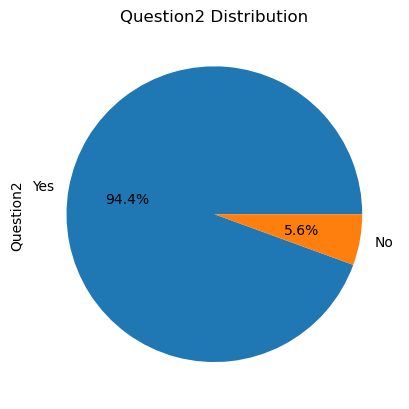

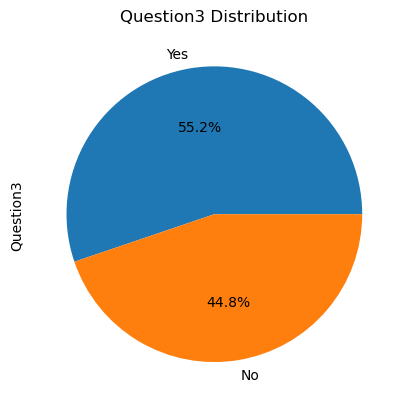

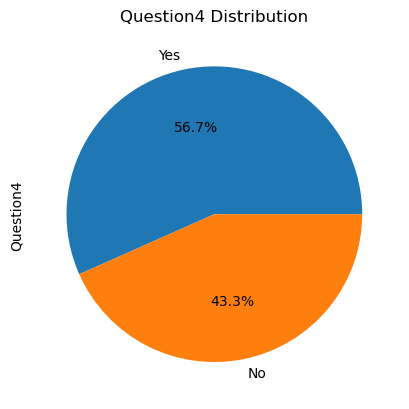

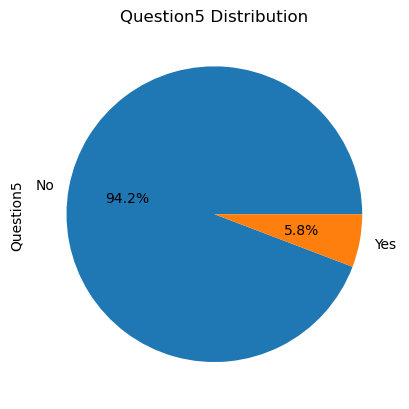

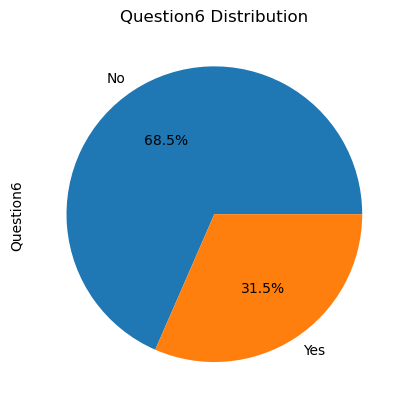

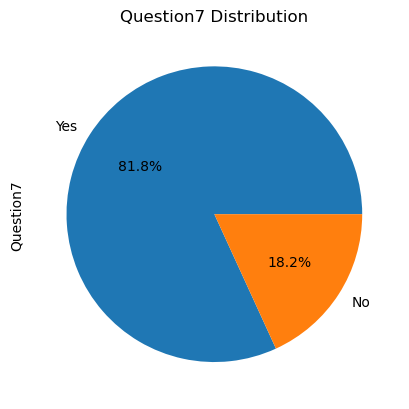

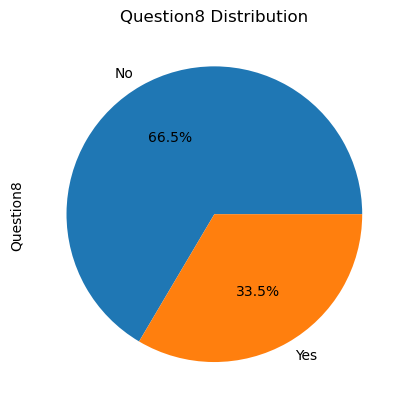

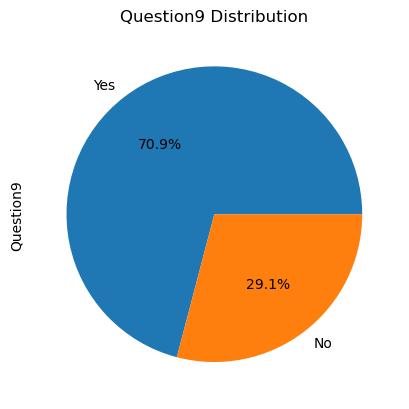

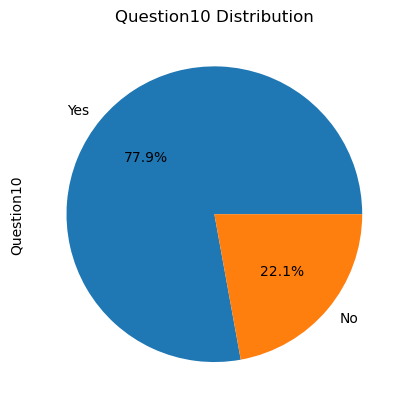

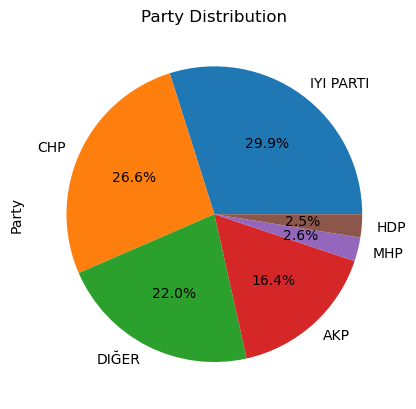

In [17]:
for col in data.columns:
    data[col].value_counts().plot(kind='pie', autopct='%.1f%%')
    plt.title(f'{col} Distribution')
    plt.show()

In [18]:
def pie_distribution(party, party_name):

    for col in party.columns:
        
        party[col].value_counts().plot(kind='pie', autopct='%.1f%%')
        plt.title(f'{col} Distribution of {party_name}')
        plt.show()

In [20]:
diger = data[data['Party']=='DIĞER'].drop(['Party'],axis=1)
mhp = data[data['Party']=='MHP'].drop(['Party'],axis=1)
iyi_parti = data[data['Party']=='IYI PARTI'].drop(['Party'],axis=1)
akp = data[data['Party']=='AKP'].drop(['Party'],axis=1)
hdp = data[data['Party']=='HDP'].drop(['Party'],axis=1)
chp = data[data['Party']=='CHP'].drop(['Party'],axis=1)

all_party = [diger, mhp, iyi_parti, akp, hdp, chp]

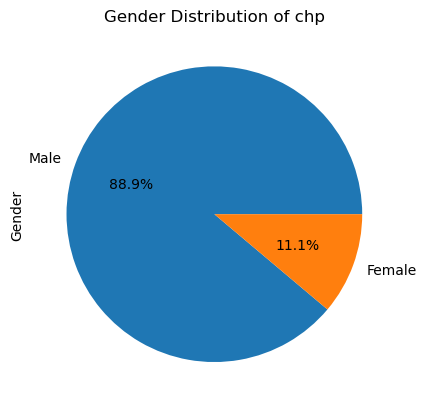

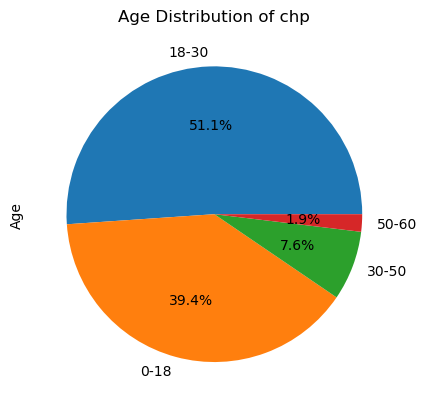

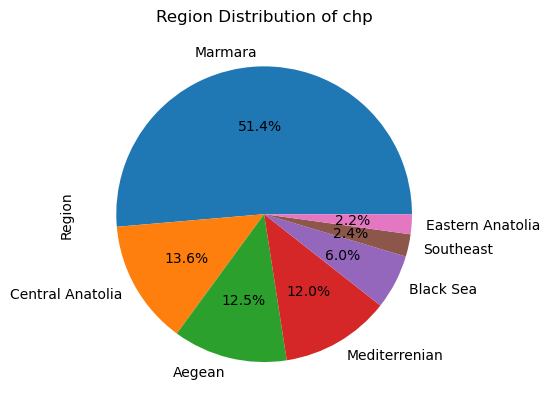

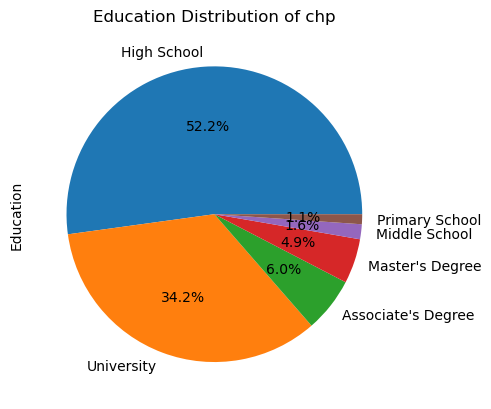

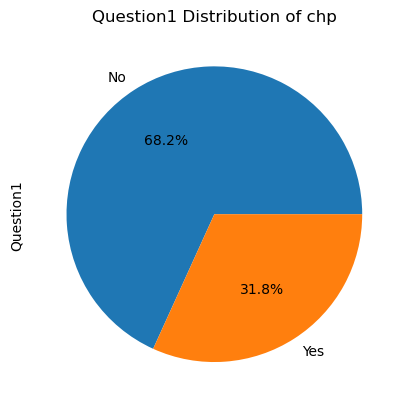

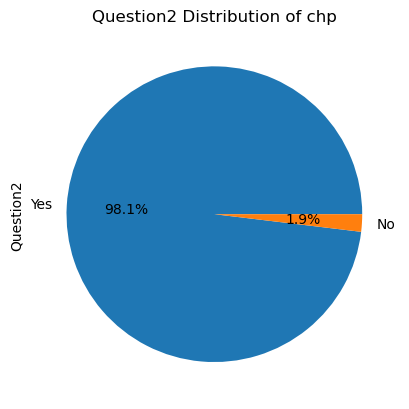

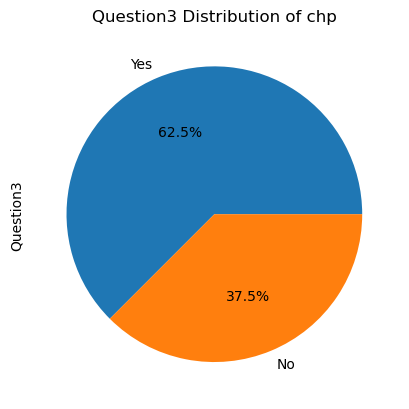

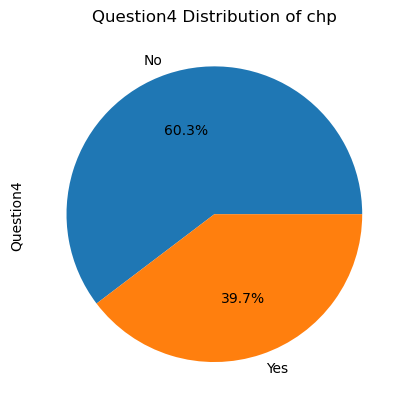

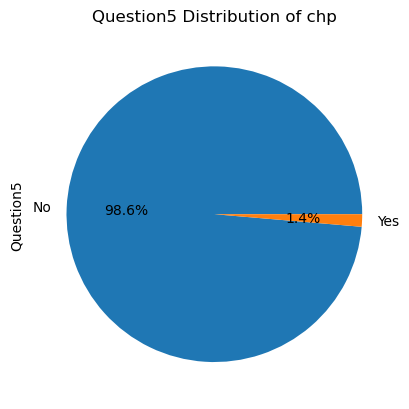

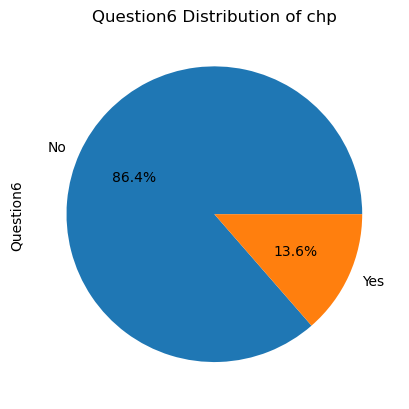

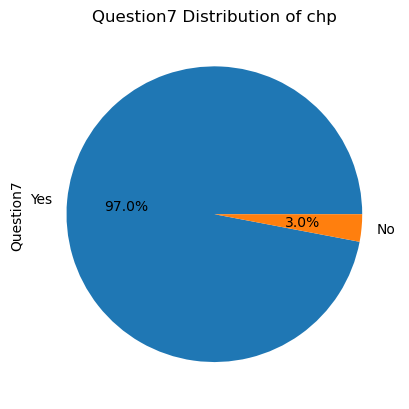

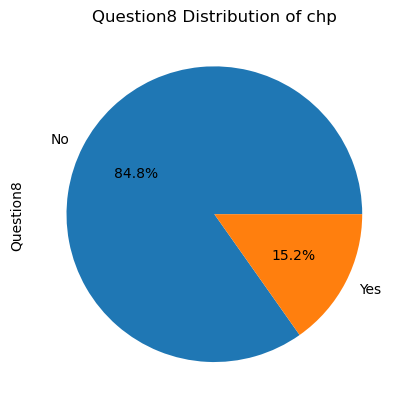

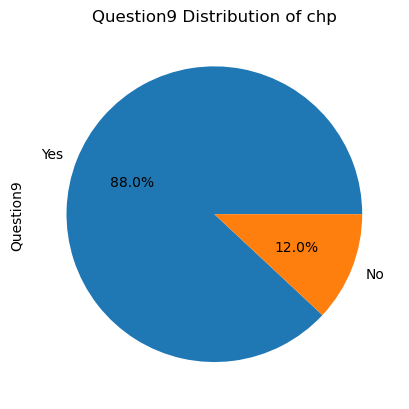

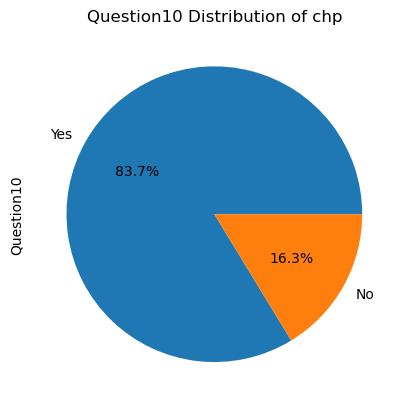

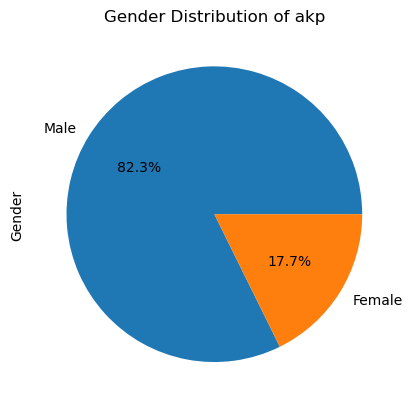

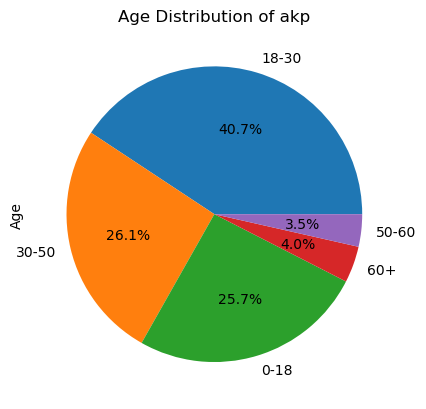

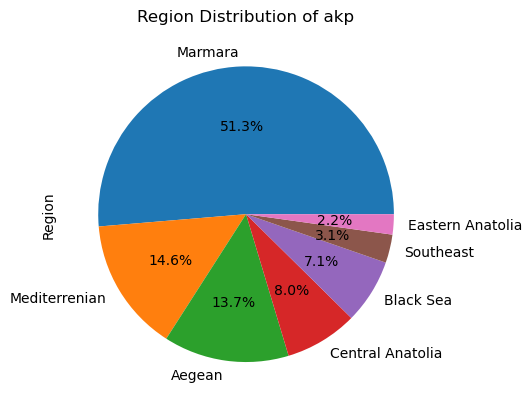

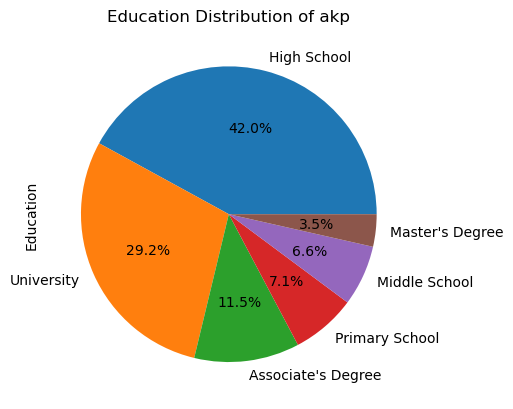

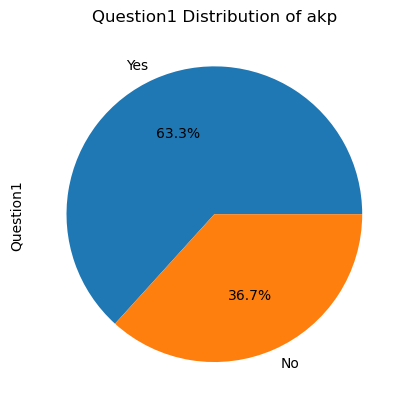

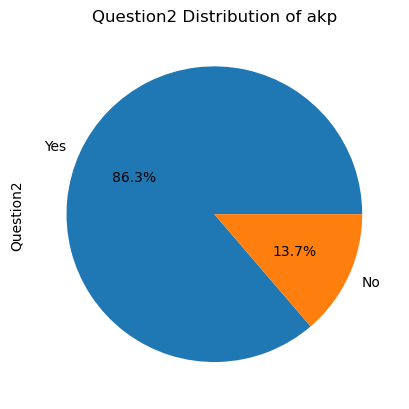

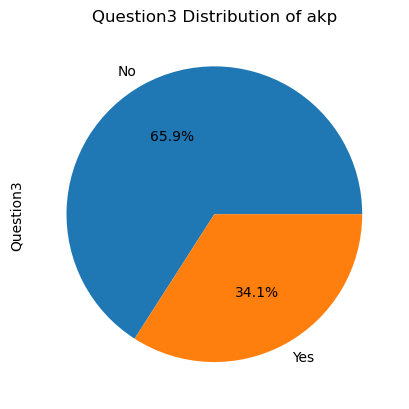

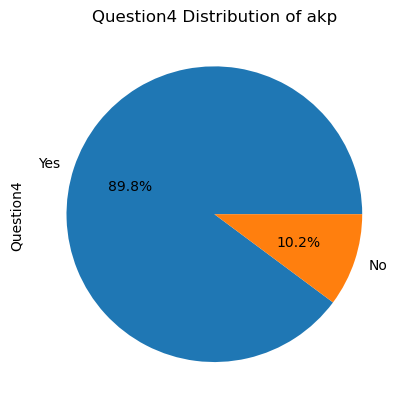

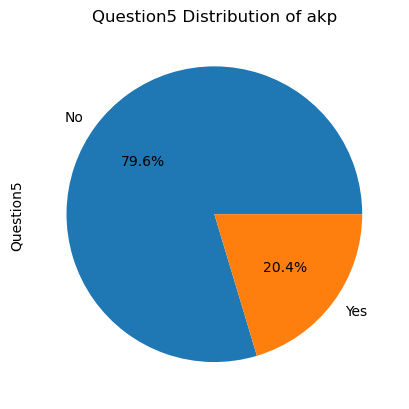

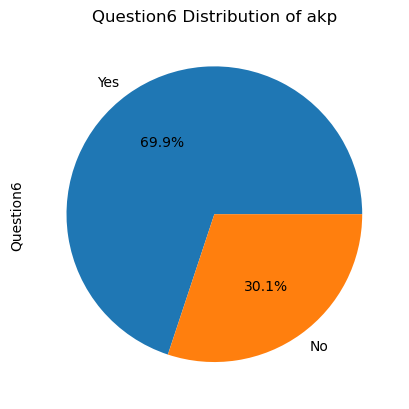

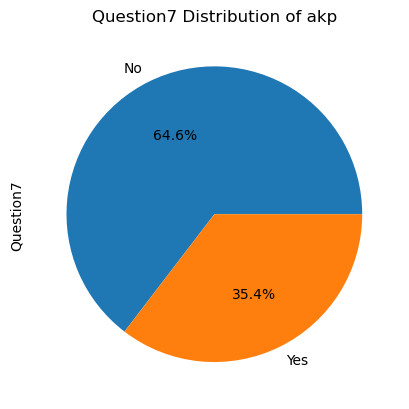

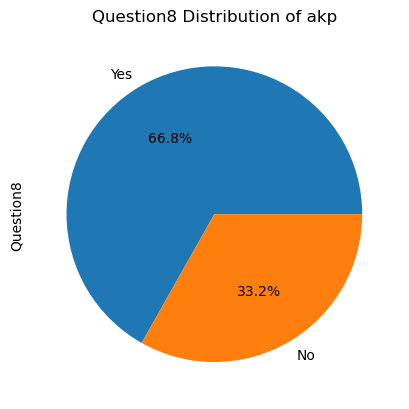

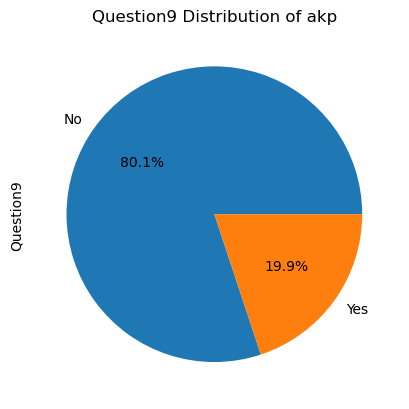

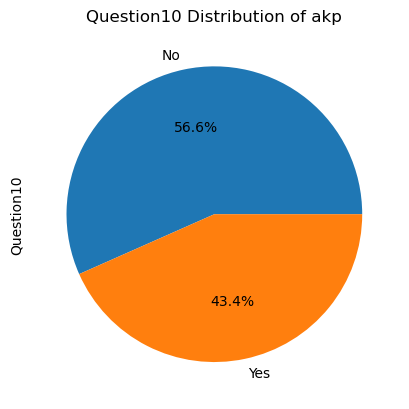

In [21]:
pie_distribution(chp, 'chp')
pie_distribution(akp, 'akp')